In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sequentia.datasets import load_random_sequences
from tslearn.utils import to_time_series_dataset

random_state = np.random.RandomState(0)

In [2]:
dataset = load_random_sequences(1000, n_features=1, n_classes=5, length_range=(5, 20), random_state=random_state)

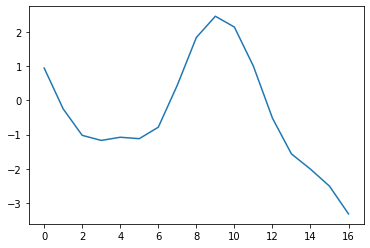

In [3]:
x = dataset.X[0]
plt.plot(range(len(x)), x)

In [4]:
import sequentia

In [5]:
%%time
clf = sequentia.KNNClassifier(k=1, classes=range(5), use_c=True).fit(*dataset[:800])
clf.evaluate(*dataset[800:], n_jobs=-1)

/Users/edwinonuonga/Dropbox/My Mac (eonu-1.local)/Desktop/Development/Python/sequentia/lib/sequentia/classifiers/knn/knn_classifier.py:192: UserWarning: Progress bars cannot be displayed when using multiple processes. Set verbose=False to silence this warning.
  warnings.warn('Progress bars cannot be displayed when using multiple processes. Set verbose=False to silence this warning.')


CPU times: user 202 ms, sys: 87.7 ms, total: 289 ms
Wall time: 6.42 s


(0.89,
 array([[45,  1,  1,  3,  1],
        [ 3, 33,  1,  0,  0],
        [ 1,  1, 38,  2,  1],
        [ 1,  0,  0, 42,  0],
        [ 0,  0,  3,  3, 20]]))

In [6]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

In [7]:
X_tsl = to_time_series_dataset(dataset.X)

In [ ]:
%%time
clf_tsl = KNeighborsTimeSeriesClassifier(n_neighbors=1, n_jobs=-1)
clf_tsl.fit(X_tsl[:800], dataset.y[:800])
clf_tsl.score(X_tsl[800:], dataset.y[800:])

CPU times: user 58.2 s, sys: 8.49 s, total: 1min 6s
Wall time: 1min 41s


0.89